# WeatherPy
----

### Analysis
* Based on data from 3/14/2019, the closer you get to the equator, the warmer the temperature tends to be. As expected, since it is currently summer time in the southern hemisphere, the weather is more similiar to the equator than the northern hemisphere, where it is winter currently. Due to the season, as you go further north, it gets colder. 
* There is no strong relationship between latitude and the humidity, with most cities having a humidity of 40% and above, no matter the distance from the equator. 
* There is a very weak to almost no relationship between latitude and cloudiness and between latitude and wind speed. For most cities, the wind speed is between 0-15 mph. There are a few outliers where the wind speed is over 25mph. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Store the list of cities into a dataframe
cities_df = pd.DataFrame({"City": cities, 
                          "Cloudiness":None, 
                          "Country":None,
                          "Date":None,
                          "Humidity":None,
                          "Lat":None,
                          "Lng":None,
                          "Max Temp":None,
                          "Wind Speed":None})
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,devils lake,None,None,None,None,None,None,None,None
1,pisco,None,None,None,None,None,None,None,None
2,parana,None,None,None,None,None,None,None,None
3,punta arenas,None,None,None,None,None,None,None,None
4,bluff,None,None,None,None,None,None,None,None


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #use F

# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
# use iterrows to iterate through cities dataframe
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in cities_df.iterrows():
    city = row["City"]
    # assemble url and make API request
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {index} | {city}")
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all'] #Get Cloudiness
        cities_df.loc[index, 'Country'] = response['sys']['country'] #Get Country
        cities_df.loc[index, 'Date'] = response['dt'] #Get Date of data collection (in unix)        
        cities_df.loc[index, 'Humidity'] = response['main']['humidity'] #Get Humidity   
        cities_df.loc[index, 'Lat'] = response['coord']['lat'] #Get latitude 
        cities_df.loc[index, 'Lng'] = response['coord']['lon'] #Get longitude     
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max'] #Get Max temp (in F)
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed'] #Get Wind Speed   
    except (KeyError, IndexError):
        print("City not found. Skipping...")


Beginning Data Retrieval
-----------------------------
Processing Record 0 | devils lake
Processing Record 1 | pisco
Processing Record 2 | parana
Processing Record 3 | punta arenas
Processing Record 4 | bluff
Processing Record 5 | hermanus
Processing Record 6 | ribeira grande
Processing Record 7 | albany
Processing Record 8 | gilazi
City not found. Skipping...
Processing Record 9 | kapaa
Processing Record 10 | leningradskiy
Processing Record 11 | ushuaia
Processing Record 12 | barrow
Processing Record 13 | sao filipe
Processing Record 14 | itarema
Processing Record 15 | talnakh
Processing Record 16 | lago da pedra
City not found. Skipping...
Processing Record 17 | busselton
Processing Record 18 | laramie
Processing Record 19 | saravan
Processing Record 20 | georgetown
Processing Record 21 | dikson
Processing Record 22 | vila velha
Processing Record 23 | sentyabrskiy
City not found. Skipping...
Processing Record 24 | iskateley
Processing Record 25 | padang
Processing Record 26 | cabedel

Processing Record 225 | hami
Processing Record 226 | salalah
Processing Record 227 | kavaratti
Processing Record 228 | oussouye
Processing Record 229 | flinders
Processing Record 230 | airai
Processing Record 231 | ahipara
Processing Record 232 | noumea
Processing Record 233 | sur
Processing Record 234 | miracatu
Processing Record 235 | basco
Processing Record 236 | lisala
Processing Record 237 | ulcinj
Processing Record 238 | sisimiut
Processing Record 239 | nioro
Processing Record 240 | udachnyy
Processing Record 241 | merritt island
Processing Record 242 | zhezkazgan
Processing Record 243 | ancud
Processing Record 244 | axim
Processing Record 245 | vysokogornyy
Processing Record 246 | pevek
Processing Record 247 | poli
Processing Record 248 | pangai
Processing Record 249 | saskylakh
Processing Record 250 | esperance
Processing Record 251 | avera
Processing Record 252 | tuktoyaktuk
Processing Record 253 | poum
Processing Record 254 | slonim
Processing Record 255 | xingyi
Processing R

Processing Record 453 | tahe
Processing Record 454 | high level
Processing Record 455 | verkhoyansk
Processing Record 456 | gijon
Processing Record 457 | sikonge
Processing Record 458 | xinxiang
Processing Record 459 | mehamn
Processing Record 460 | north bend
Processing Record 461 | high rock
Processing Record 462 | kashi
City not found. Skipping...
Processing Record 463 | takaungu
Processing Record 464 | magadan
Processing Record 465 | pustoshka
Processing Record 466 | karakendzha
City not found. Skipping...
Processing Record 467 | namibe
Processing Record 468 | lyskovo
Processing Record 469 | daru
Processing Record 470 | scottsburgh
City not found. Skipping...
Processing Record 471 | gourdon
Processing Record 472 | banjar
Processing Record 473 | north platte
Processing Record 474 | vao
Processing Record 475 | poya
Processing Record 476 | hortobagy
Processing Record 477 | penzance
Processing Record 478 | bat yam
Processing Record 479 | jardim do serido
Processing Record 480 | nicoya


In [6]:
#drop the cities where API couldn't find the weather info
cities_df = cities_df.dropna(how="any")

In [7]:
#Check that counts all match for each attribute
cities_df.count()

City          524
Cloudiness    524
Country       524
Date          524
Humidity      524
Lat           524
Lng           524
Max Temp      524
Wind Speed    524
dtype: int64

In [8]:
# save the dataframe as a csv
cities_df.to_csv("output_data/cities.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [86]:
#convert latitude to a number
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
#convert max temp to a number
cities_df['Max Temp'] = pd.to_numeric(cities_df['Max Temp'])

#### Latitude vs. Temperature Plot

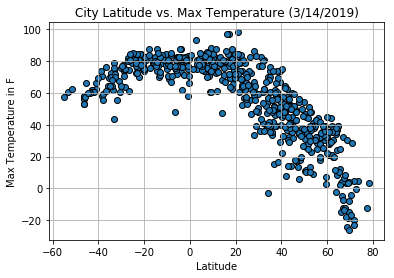

In [87]:
# Create a scatter plot which compares city latitude to max temperature

plt.scatter(cities_df["Lat"], cities_df["Max Temp"], edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in F")
plt.title("City Latitude vs. Max Temperature (3/14/2019)")
plt.savefig("Max Temp.png")

#### Latitude vs. Humidity Plot

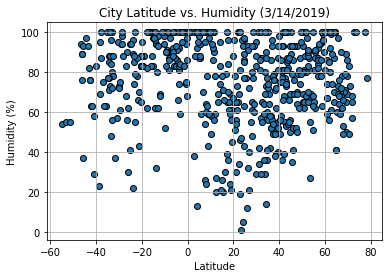

In [88]:
# Create a scatter plot which compares city latitude to Humidity

plt.scatter(cities_df["Lat"], cities_df["Humidity"], edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (3/14/2019)")
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

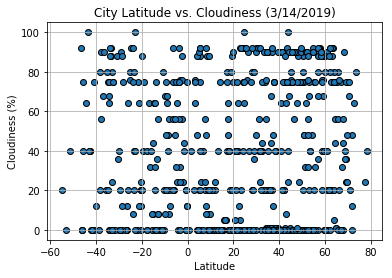

In [89]:
# Create a scatter plot which compares city latitude to cloudiness

plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (3/14/2019)")
plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

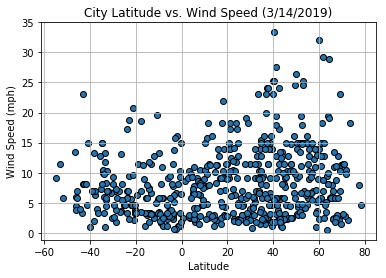

In [90]:
# Create a scatter plot which compares city latitude to wind speed

plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (3/14/2019)")
plt.savefig("Wind Speed.png")